Что это?
Статистические данные и графики

In [1]:
import sys
import pandas as pd
import numpy as np

import seaborn
# import plotly.express as px
# seaborn на гистограммах показывает среднее количество заказов, а plotly - абсолютное. использовать в зависимости от необходимости

from pprint import pprint

# modules from guru-core
from df_utils import filter_df, get_extended_orders_df, defSeason, defIsHoliday, defAvgT

df = pd.read_csv('orders.csv',header=0, delimiter=';')
df = get_extended_orders_df(df)
df['dow'] = df.index.dayofweek  # Monday=0
df['month'] = df.index.month    # January=1, December=12
df['season'] = df['month'].apply(defSeason) # winter=0
df['is_holiday'] = df['dow'].apply(defIsHoliday) # is_holiday = 1 в сб и вскр
df

orders_n  dow  month  season  is_holiday
2020-01-01         1    2      1       0           0
2020-01-02         5    3      1       0           0
2020-01-03         5    4      1       0           0
2020-01-04         1    5      1       0           1
2020-01-05         1    6      1       0           1
...              ...  ...    ...     ...         ...
2020-12-26         4    5     12       0           1
2020-12-27         4    6     12       0           1
2020-12-28         3    0     12       0           0
2020-12-29         3    1     12       0           0
2020-12-30         7    2     12       0           0

[365 rows x 5 columns]

[Text(0.5, 0, 'Сезон, 0 - зима, 1 - весна, 3 - лето, 4 - осень'),
 Text(0, 0.5, 'Среднее количество заказов в день'),
 Text(0.5, 1.0, 'Среднее количество заказов по сезону')]

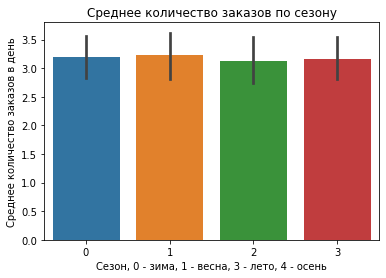

In [2]:
# Гистограмма зависимости среднего количества заказов от сезона
# 1 - зима, 2 - весна, 3 - лето, 4 - осень
# Как видим, от сезона спрос не очень зависит и примерно одинаковый
seaborn.barplot( data=df, x="season", y="orders_n" ).set(xlabel='Сезон, 0 - зима, 1 - весна, 3 - лето, 4 - осень', ylabel='Среднее количество заказов в день', title="Среднее количество заказов по сезону")

[Text(0.5, 0, 'Месяц: 1 - Январь, 12 - Декабрь'),
 Text(0, 0.5, 'Среднее количество заказов в день'),
 Text(0.5, 1.0, 'Среднее количество заказов в день за разные месяцы')]

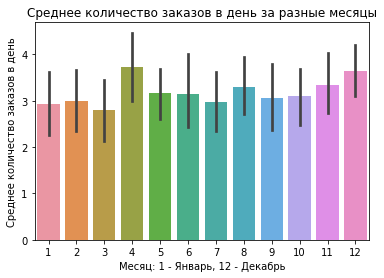

In [3]:
# Гистограмма зависимости среднего количества заказов от месяца
seaborn.barplot( data=df, x="month", y="orders_n").set(xlabel='Месяц: 1 - Январь, 12 - Декабрь', ylabel='Среднее количество заказов в день', title="Среднее количество заказов в день за разные месяцы")
# px.bar(df1, x="dow", y="orders_n")
# px.bar(df1, x="month", y="orders_n")
# Итого: больше всего заказов в апреле (112), декабре (109) и августе (102)

[Text(0.5, 0, 'День недели: 0 - пн, 7 - вскр'),
 Text(0, 0.5, 'Среднее количество заказов в день'),
 Text(0.5, 1.0, 'Среднее количество заказов по дням недели')]

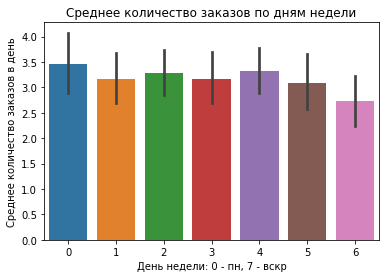

In [4]:
# Гистограмма зависимости среднего количества заказов от дня недели
seaborn.barplot( data=df, x="dow", y="orders_n").set(xlabel='День недели: 0 - пн, 7 - вскр', ylabel='Среднее количество заказов в день', title="Среднее количество заказов по дням недели")
# px.bar(df1, x="dow", y="orders_n")
# Больше всего заказов в понедельник, потом их количество уменьшается

[Text(0.5, 0, 'День: 0-будний, 1-выходной'),
 Text(0, 0.5, 'Среднее количество заказов в день'),
 Text(0.5, 1.0, 'Среднее количество заказов в будние и выходные дни')]

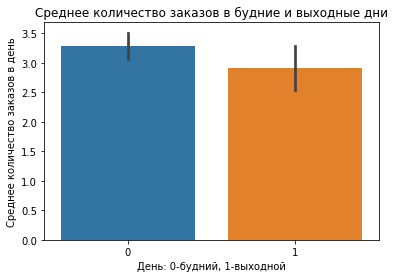

In [5]:
# Гистограмма зависимости среднего количества заказов от выходной ли день
seaborn.barplot( data=df, x="is_holiday", y="orders_n").set(xlabel='День: 0-будний, 1-выходной', ylabel='Среднее количество заказов в день', title="Среднее количество заказов в будние и выходные дни")
# Как видим, чаще заказывают в будний день